In [1]:
'''Necessary imports'''
import sqlite3 as sq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import glob

In [58]:
'''Initializing to import SQLite database'''
con = sq.connect("resultsBaseScenario.db")
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

In [78]:
'''Extracting results-database as dataframes, from GAMS'''
conBase = sq.connect("resultsBaseScenario.db")
conHH = sq.connect("resultsHarmonyHorizon.db")
conTT = sq.connect("resultsTurbulentTimes.db")

BaseInstalled_df = pd.read_sql_query("SELECT * FROM var_installed_cap", conBase)
HHInstalled_df = pd.read_sql_query("SELECT * FROM var_installed_cap", conHH)
TTInstalled_df = pd.read_sql_query("SELECT * FROM var_installed_cap", conTT)

BaseGeneration_df = pd.read_sql_query("SELECT * FROM var_g", conBase)
HHGeneration_df = pd.read_sql_query("SELECT * FROM var_g", conHH)
TTGeneration_df = pd.read_sql_query("SELECT * FROM var_g", conTT)

display(BaseInstalled_df)
display(HHInstalled_df)
display(TTInstalled_df)
display(BaseGeneration_df)

,technology,level,lo,up,marginal
0,wind,400000.0,0.0,1.000000e+100,0.0
1,pv,400000.0,0.0,1.000000e+100,0.0
2,hydro,9000.0,0.0,1.000000e+100,0.0
3,other,55138.6,0.0,1.000000e+100,0.0
4,gas,0.0,0.0,1.000000e+100,81300.0
5,coal,0.0,0.0,1.000000e+100,249300.0
6,biomass,0.0,0.0,1.000000e+100,271000.0


,technology,level,lo,up,marginal
0,wind,311681.565657,0.0,1.000000e+100,0.0
1,pv,139839.103535,0.0,1.000000e+100,0.0
2,hydro,12000.000000,0.0,1.000000e+100,0.0
3,other,20917.076641,0.0,1.000000e+100,0.0
4,gas,16864.650000,0.0,1.000000e+100,0.0
5,coal,0.000000,0.0,1.000000e+100,0.0
6,biomass,0.000000,0.0,1.000000e+100,297504.5


,technology,level,lo,up,marginal
0,wind,150631.159420,0.0,1.000000e+100,0.0
1,pv,66776.891353,0.0,1.000000e+100,0.0
2,hydro,4900.000000,0.0,1.000000e+100,0.0
3,other,11749.246333,0.0,1.000000e+100,0.0
4,gas,83596.873515,0.0,1.000000e+100,0.0
5,coal,0.000000,0.0,1.000000e+100,424308.0
6,biomass,0.000000,0.0,1.000000e+100,410055.2


,h,technology,level,lo,up,marginal
0,h1,wind,35923.950,0.0,1.000000e+100,0.0
1,h1,pv,0.000,0.0,1.000000e+100,0.0
2,h1,hydro,3600.000,0.0,1.000000e+100,0.0
3,h1,other,0.000,0.0,1.000000e+100,9999.5
4,h1,gas,0.000,0.0,1.000000e+100,3.0
...,...,...,...,...,...,...
61315,h8760,hydro,3600.000,0.0,1.000000e+100,0.0
61316,h8760,other,7244.175,0.0,1.000000e+100,0.0
61317,h8760,gas,0.000,0.0,1.000000e+100,0.0
61318,h8760,coal,0.000,0.0,1.000000e+100,9.5


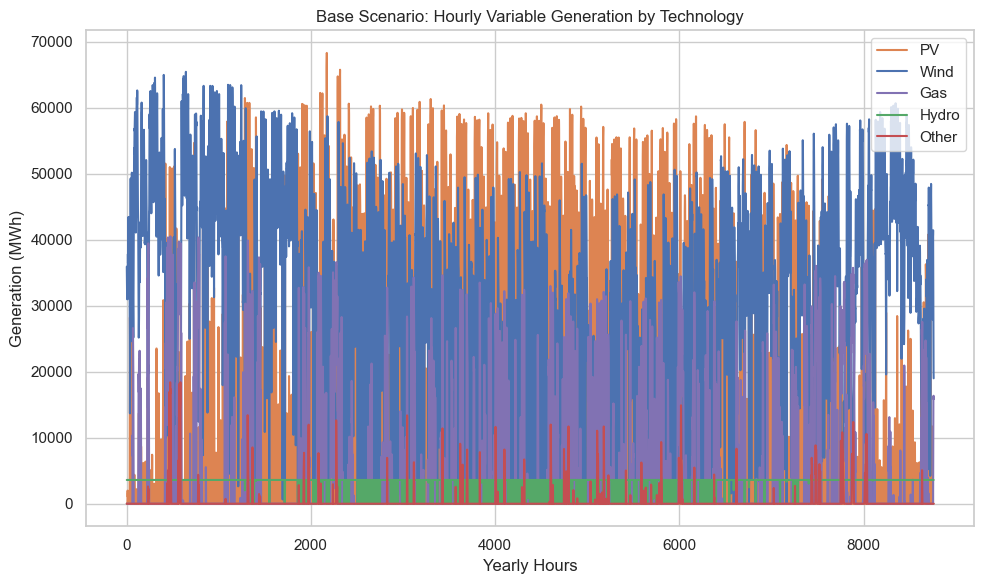

In [32]:
'''Base Scenario: Plotting hourly variable generation throughout the year'''

# Assuming df_hourly_generation contains the hourly generation data
# Extract the columns for different technologies
wind_generation = BaseGeneration_df['level'][0::7]
pv_generation = BaseGeneration_df['level'][1::7]
hydro_generation = BaseGeneration_df['level'][2::7]
other_generation = BaseGeneration_df['level'][3::7]
gas_generation = BaseGeneration_df['level'][4::7]
# ... (repeat for other technologies)

# Create a range of hours for the x-axis (assuming 8760 hours in a year)
hours = range(1, len(wind_generation) + 1)  # Replace with your actual number of hours

# Use Seaborn color palette
palette = sns.color_palette('deep')  # Choose the appropriate palette

# Plotting with Seaborn colors
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(hours, pv_generation, label='PV', linestyle='-', color=palette[1])
plt.plot(hours, wind_generation, label='Wind', linestyle='-', color=palette[0])
plt.plot(hours, gas_generation, label='Gas', linestyle='-', color=palette[4])
plt.plot(hours, hydro_generation, label='Hydro', linestyle='-', color=palette[2])
plt.plot(hours, other_generation, label='Other', linestyle='-', color=palette[3])

plt.xlabel('Yearly Hours')
plt.ylabel('Generation (MWh)')
plt.title('Base Scenario: Hourly Variable Generation by Technology')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


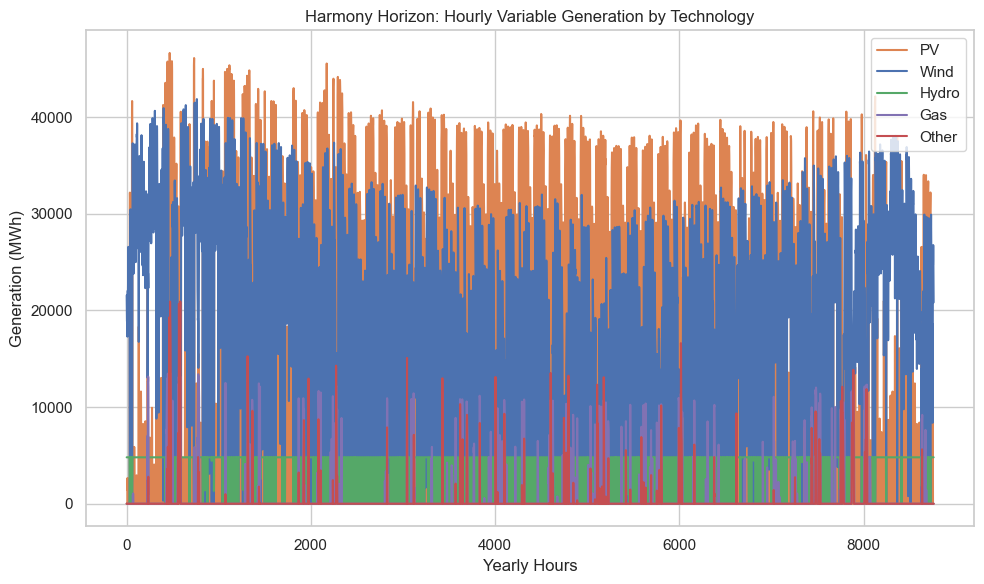

In [34]:
'''Harmony Horizon: Plotting hourly variable generation throughout the year'''

# Assuming df_hourly_generation contains the hourly generation data
# Extract the columns for different technologies
wind_generation = HHGeneration_df['level'][0::7]
pv_generation = HHGeneration_df['level'][1::7]
hydro_generation = HHGeneration_df['level'][2::7]
other_generation = HHGeneration_df['level'][3::7]
gas_generation = HHGeneration_df['level'][4::7]
# ... (repeat for other technologies)

# Create a range of hours for the x-axis (assuming 8760 hours in a year)
hours = range(1, len(wind_generation) + 1)  # Replace with your actual number of hours

# Use Seaborn color palette
palette = sns.color_palette('deep')  # Choose the appropriate palette

# Plotting with Seaborn colors
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(hours, pv_generation, label='PV', linestyle='-', color=palette[1])
plt.plot(hours, wind_generation, label='Wind', linestyle='-', color=palette[0])
plt.plot(hours, hydro_generation, label='Hydro', linestyle='-', color=palette[2])
plt.plot(hours, gas_generation, label='Gas', linestyle='-', color=palette[4])
plt.plot(hours, other_generation, label='Other', linestyle='-', color=palette[3])

plt.xlabel('Yearly Hours')
plt.ylabel('Generation (MWh)')
plt.title('Harmony Horizon: Hourly Variable Generation by Technology')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

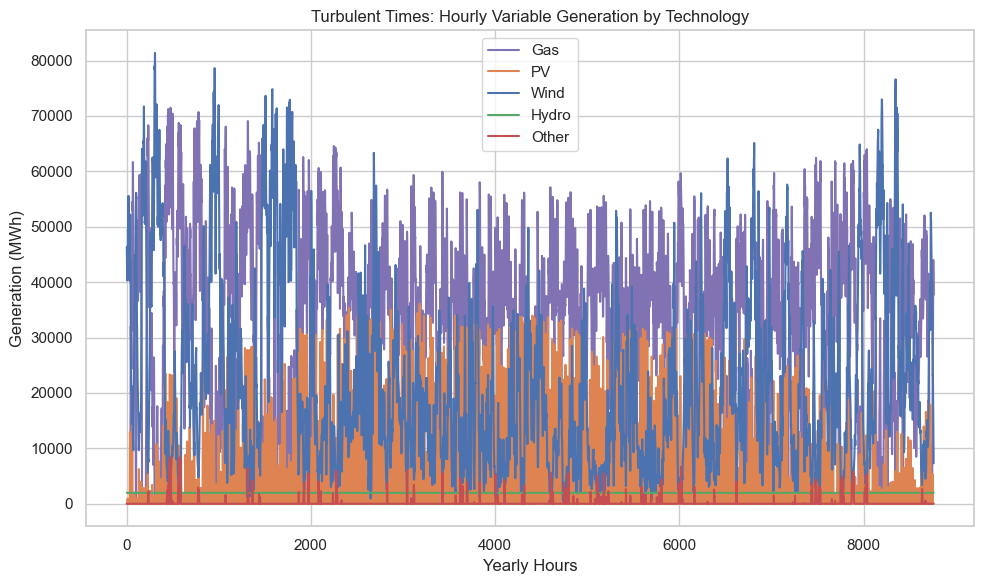

In [36]:
'''Turbulent Times: Plotting hourly variable generation throughout the year'''

# Assuming df_hourly_generation contains the hourly generation data
# Extract the columns for different technologies
wind_generation = TTGeneration_df['level'][0::7]
pv_generation = TTGeneration_df['level'][1::7]
hydro_generation = TTGeneration_df['level'][2::7]
other_generation = TTGeneration_df['level'][3::7]
gas_generation = TTGeneration_df['level'][4::7]
# ... (repeat for other technologies)

# Create a range of hours for the x-axis (assuming 8760 hours in a year)
hours = range(1, len(wind_generation) + 1)  # Replace with your actual number of hours

# Use Seaborn color palette
palette = sns.color_palette('deep')  # Choose the appropriate palette

# Plotting with Seaborn colors
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(hours, gas_generation, label='Gas', linestyle='-', color=palette[4])
plt.plot(hours, pv_generation, label='PV', linestyle='-', color=palette[1])
plt.plot(hours, wind_generation, label='Wind', linestyle='-', color=palette[0])
plt.plot(hours, hydro_generation, label='Hydro', linestyle='-', color=palette[2])
plt.plot(hours, other_generation, label='Other', linestyle='-', color=palette[3])

plt.xlabel('Yearly Hours')
plt.ylabel('Generation (MWh)')
plt.title('Turbulent Times: Hourly Variable Generation by Technology')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

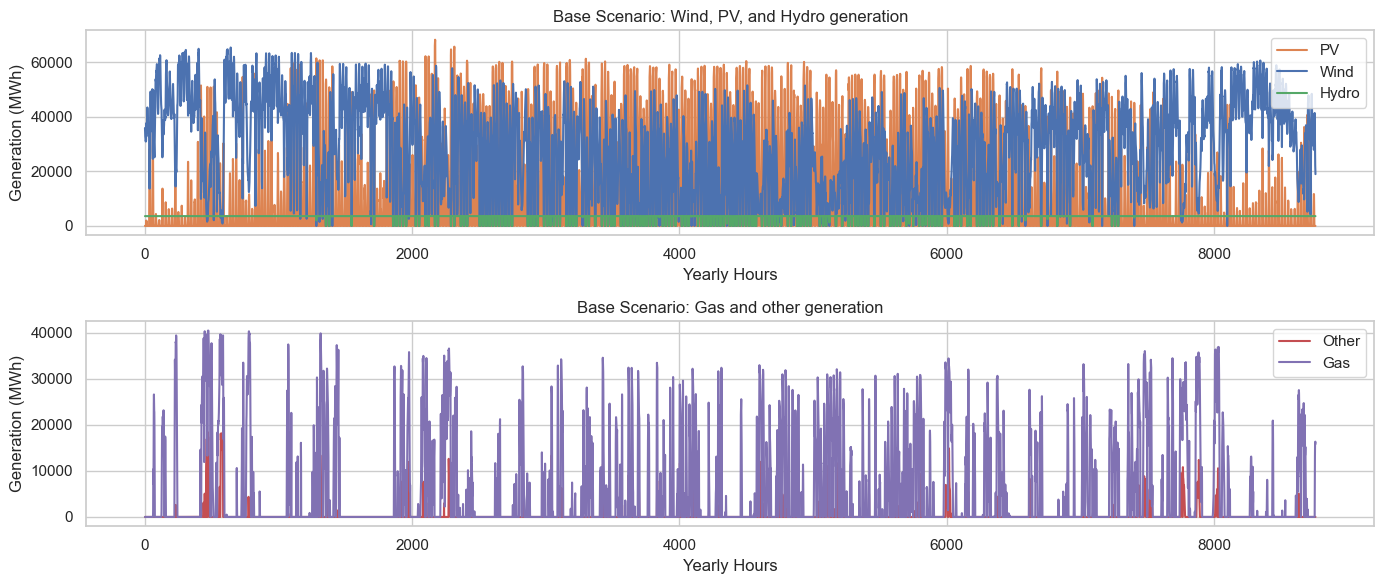

In [45]:
'''Base Scenario: Plotting Variable Generation as separate plots for simplicity'''

# Assuming df_hourly_generation contains the hourly generation data
# Extract the columns for different technologies
wind_generation = BaseGeneration_df['level'][0::7]
pv_generation = BaseGeneration_df['level'][1::7]
hydro_generation = BaseGeneration_df['level'][2::7]
other_generation = BaseGeneration_df['level'][3::7]
gas_generation = BaseGeneration_df['level'][4::7]

# Create a range of hours for the x-axis (assuming 8760 hours in a year)
hours = range(1, len(wind_generation) + 1)  # Replace with your actual number of hours

# Use Seaborn color palette
palette = sns.color_palette('deep')  # Choose the appropriate palette

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 6))  # Two subplots

# Plotting with Seaborn colors - First subplot (Wind, PV, Hydro)
axs[0].plot(hours, pv_generation, label='PV', linestyle='-', color=palette[1])
axs[0].plot(hours, wind_generation, label='Wind', linestyle='-', color=palette[0])
axs[0].plot(hours, hydro_generation, label='Hydro', linestyle='-', color=palette[2])

# Label and title for the first subplot
axs[0].set_xlabel('Yearly Hours')
axs[0].set_ylabel('Generation (MWh)')
axs[0].set_title('Base Scenario: Wind, PV, and Hydro generation')
axs[0].legend()
axs[0].grid(True)

# Plotting with Seaborn colors - Second subplot (Other, Gas)
axs[1].plot(hours, other_generation, label='Other', linestyle='-', color=palette[3])
axs[1].plot(hours, gas_generation, label='Gas', linestyle='-', color=palette[4])

# Label and title for the second subplot
axs[1].set_xlabel('Yearly Hours')
axs[1].set_ylabel('Generation (MWh)')
axs[1].set_title('Base Scenario: Gas and other generation')
axs[1].legend()
axs[1].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()


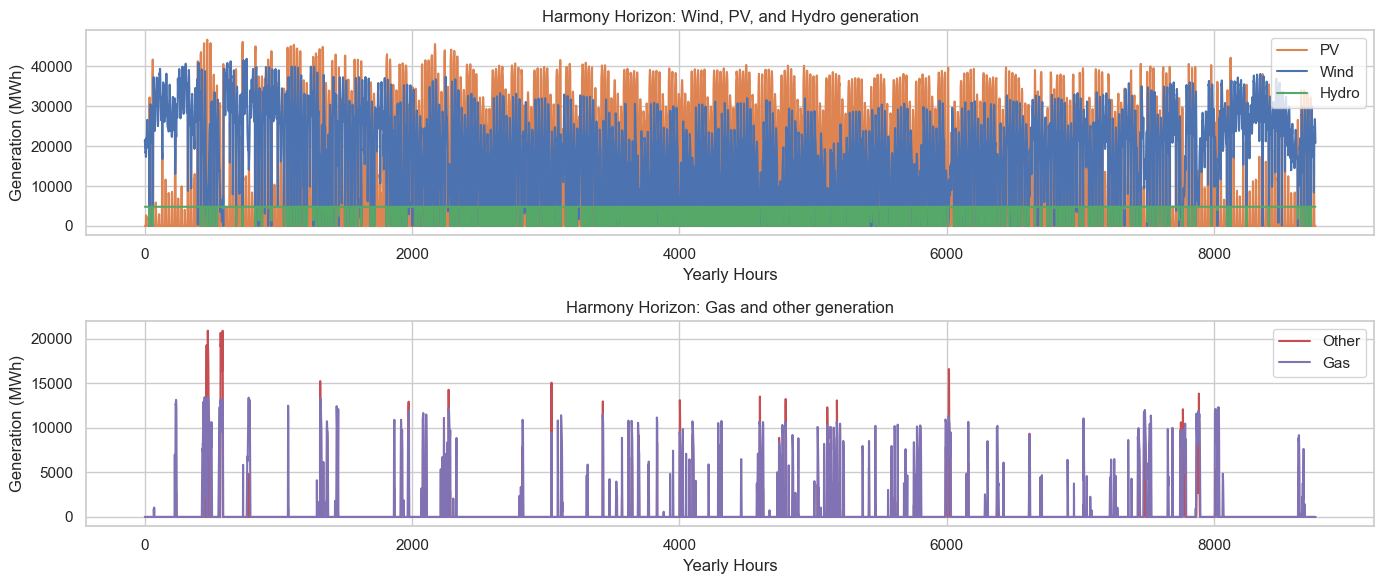

In [46]:
'''Harmony Horizon: Plotting Variable Generation as separate plots for simplicity'''

# Assuming df_hourly_generation contains the hourly generation data
# Extract the columns for different technologies
wind_generation = HHGeneration_df['level'][0::7]
pv_generation = HHGeneration_df['level'][1::7]
hydro_generation = HHGeneration_df['level'][2::7]
other_generation = HHGeneration_df['level'][3::7]
gas_generation = HHGeneration_df['level'][4::7]

# Create a range of hours for the x-axis (assuming 8760 hours in a year)
hours = range(1, len(wind_generation) + 1)  # Replace with your actual number of hours

# Use Seaborn color palette
palette = sns.color_palette('deep')  # Choose the appropriate palette

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 6))  # Two subplots

# Plotting with Seaborn colors - First subplot (Wind, PV, Hydro)
axs[0].plot(hours, pv_generation, label='PV', linestyle='-', color=palette[1])
axs[0].plot(hours, wind_generation, label='Wind', linestyle='-', color=palette[0])
axs[0].plot(hours, hydro_generation, label='Hydro', linestyle='-', color=palette[2])

# Label and title for the first subplot
axs[0].set_xlabel('Yearly Hours')
axs[0].set_ylabel('Generation (MWh)')
axs[0].set_title('Harmony Horizon: Wind, PV, and Hydro generation')
axs[0].legend()
axs[0].grid(True)

# Plotting with Seaborn colors - Second subplot (Other, Gas)
axs[1].plot(hours, other_generation, label='Other', linestyle='-', color=palette[3])
axs[1].plot(hours, gas_generation, label='Gas', linestyle='-', color=palette[4])

# Label and title for the second subplot
axs[1].set_xlabel('Yearly Hours')
axs[1].set_ylabel('Generation (MWh)')
axs[1].set_title('Harmony Horizon: Gas and other generation')
axs[1].legend()
axs[1].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

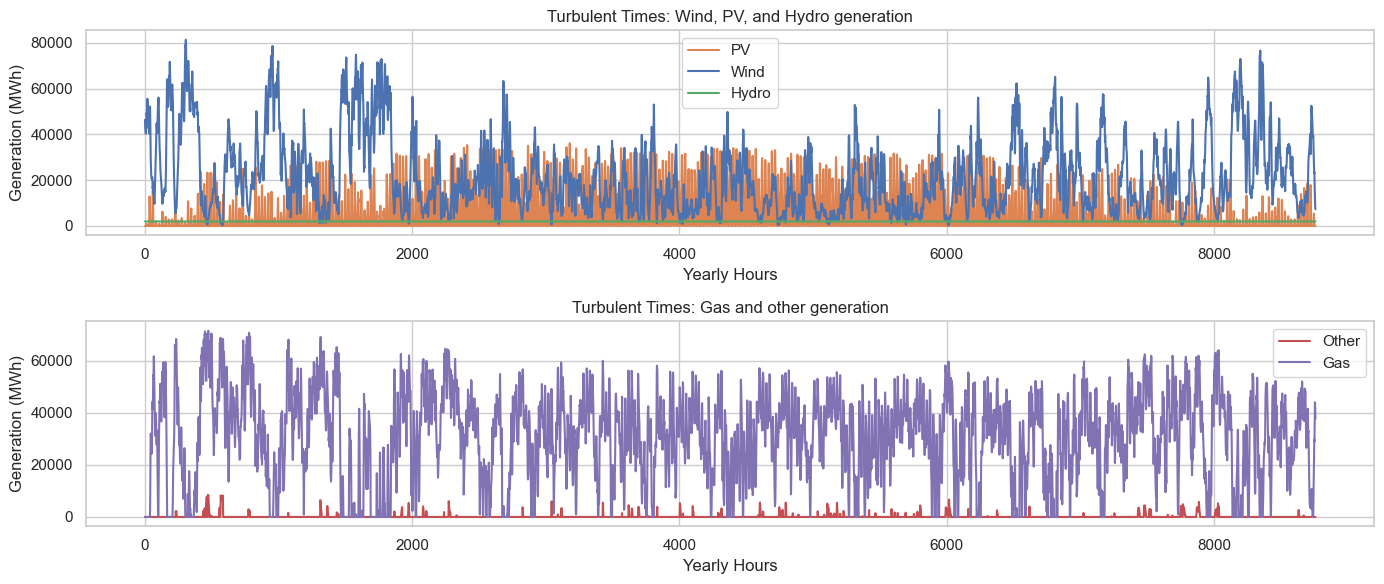

In [48]:
'''Turbulent Times: Plotting Variable Generation as separate plots for simplicity'''

# Assuming df_hourly_generation contains the hourly generation data
# Extract the columns for different technologies
wind_generation = TTGeneration_df['level'][0::7]
pv_generation = TTGeneration_df['level'][1::7]
hydro_generation = TTGeneration_df['level'][2::7]
other_generation = TTGeneration_df['level'][3::7]   
gas_generation = TTGeneration_df['level'][4::7]

# Create a range of hours for the x-axis (assuming 8760 hours in a year)
hours = range(1, len(wind_generation) + 1)  # Replace with your actual number of hours

# Use Seaborn color palette
palette = sns.color_palette('deep')  # Choose the appropriate palette

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 6))  # Two subplots

# Plotting with Seaborn colors - First subplot (Wind, PV, Hydro)
axs[0].plot(hours, pv_generation, label='PV', linestyle='-', color=palette[1])
axs[0].plot(hours, wind_generation, label='Wind', linestyle='-', color=palette[0])
axs[0].plot(hours, hydro_generation, label='Hydro', linestyle='-', color=palette[2])

# Label and title for the first subplot
axs[0].set_xlabel('Yearly Hours')
axs[0].set_ylabel('Generation (MWh)')
axs[0].set_title('Turbulent Times: Wind, PV, and Hydro generation')
axs[0].legend()
axs[0].grid(True)

# Plotting with Seaborn colors - Second subplot (Other, Gas)
axs[1].plot(hours, other_generation, label='Other', linestyle='-', color=palette[3])
axs[1].plot(hours, gas_generation, label='Gas', linestyle='-', color=palette[4])

# Label and title for the second subplot
axs[1].set_xlabel('Yearly Hours')
axs[1].set_ylabel('Generation (MWh)')
axs[1].set_title('Turbulent Times: Gas and other generation')
axs[1].legend()
axs[1].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

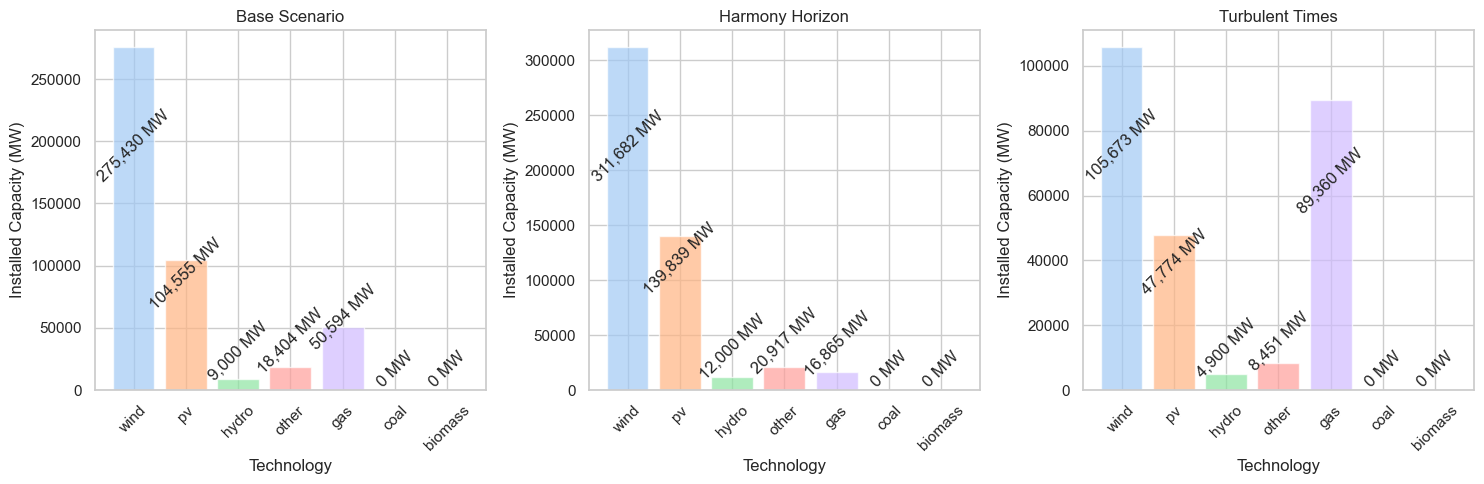

In [49]:
'''Installed Capacity for the three scenarios'''

# Assuming BaseInstalled_df, HHInstalled_df, and TTInstalled_df have the same structure
scenarios = ['Base Scenario', 'Harmony Horizon', 'Turbulent Times']
dfs = [BaseInstalled_df, HHInstalled_df, TTInstalled_df]

# Get the technologies and their capacities for each scenario
technology_columns = [df['technology'].tolist() for df in dfs]
capacity_columns = [df['level'].tolist() for df in dfs]

# Set Seaborn pastel palette
sns.set_palette("pastel")

# Set up the subplots
fig, axs = plt.subplots(1, len(scenarios), figsize=(15, 5))  # Adjust the figsize as needed

# Plot installed capacities for each technology in each scenario
for i, scenario in enumerate(scenarios):
    ax = axs[i]
    for j, tech in enumerate(technology_columns[0]):
        values = [capacities[j] for capacities in capacity_columns]
        if tech == 'wind':
            ax.bar(tech, values[i], label=tech, alpha=0.7)
            ax.text(tech, values[i] * 0.6, f'{values[i]:,.0f} MW', ha='center', va='bottom', rotation=45)
        else:
            ax.bar(tech, values[i], label=tech, alpha=0.7)
            ax.text(tech, values[i] * 0.6, f'{values[i]:,.0f} MW', ha='center', va='bottom', rotation=45)

    ax.set_ylabel('Installed Capacity (MW)')
    ax.set_xlabel('Technology')
    ax.set_title(scenario)

    # Rotate x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha='center')

plt.tight_layout()
plt.show()





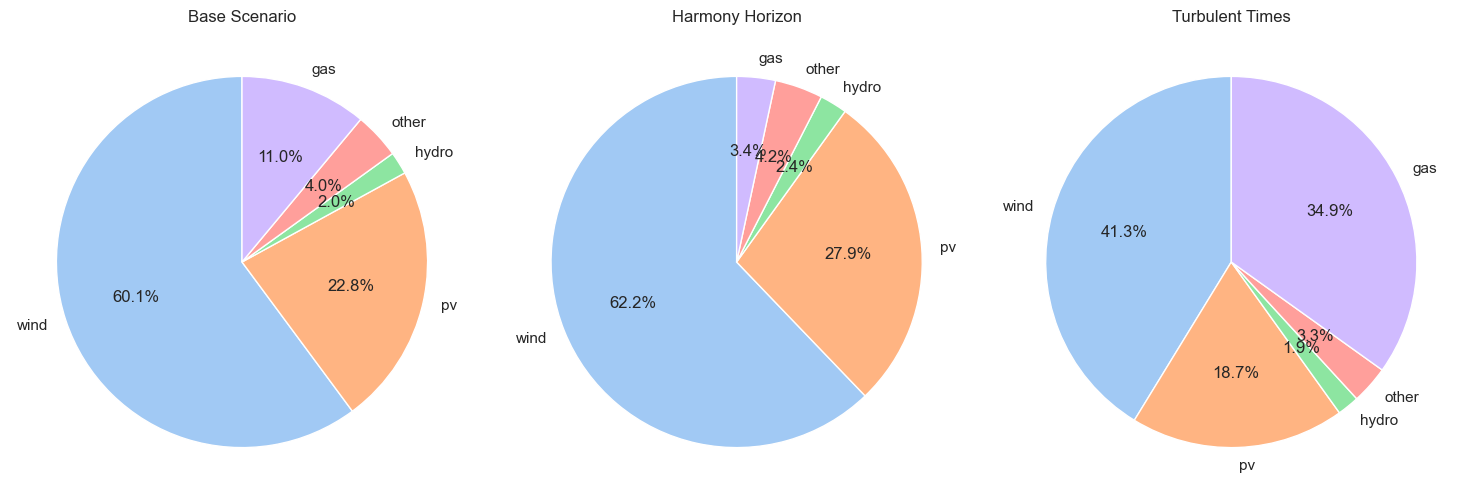

In [50]:
'''Plotting the same results as a pie-chart'''


# Assuming BaseInstalled_df, HHInstalled_df, and TTInstalled_df have the same structure
scenarios = ['Base Scenario', 'Harmony Horizon', 'Turbulent Times']
dfs = [BaseInstalled_df, HHInstalled_df, TTInstalled_df]

# Get the technologies and their capacities for each scenario
technology_columns = [df['technology'].tolist() for df in dfs]
capacity_columns = [df['level'].tolist() for df in dfs]

# Set up the subplots
fig, axs = plt.subplots(1, len(scenarios), figsize=(15, 5))  # Adjust the figsize as needed

# Plot installed capacities for each technology in each scenario as a pie chart
for i, scenario in enumerate(scenarios):
    ax = axs[i]
    values = [capacity for capacity in capacity_columns[i] if capacity > 0]  # Filter out capacities > 0
    tech_labels = [tech for tech, capacity in zip(technology_columns[i], capacity_columns[i]) if capacity > 0]
    # Plotting the pie chart if there are values greater than 0
    if values:
        ax.pie(values, labels=tech_labels, autopct='%1.1f%%', startangle=90)
        ax.set_title(scenario)

plt.tight_layout()
plt.show()



In [51]:
'''Investigating Total System Costs for the Different Scenarios'''

BaseCosts_df = int(pd.read_sql_query("SELECT * FROM scalarvariables", conBase)["level"].iloc[0])
HHCosts_df = int(pd.read_sql_query("SELECT * FROM scalarvariables", conHH)["level"].iloc[0])
TTCosts_df = int(pd.read_sql_query("SELECT * FROM scalarvariables", conTT)["level"].iloc[0])

tot_sys_costs = [BaseCosts_df, HHCosts_df, TTCosts_df]


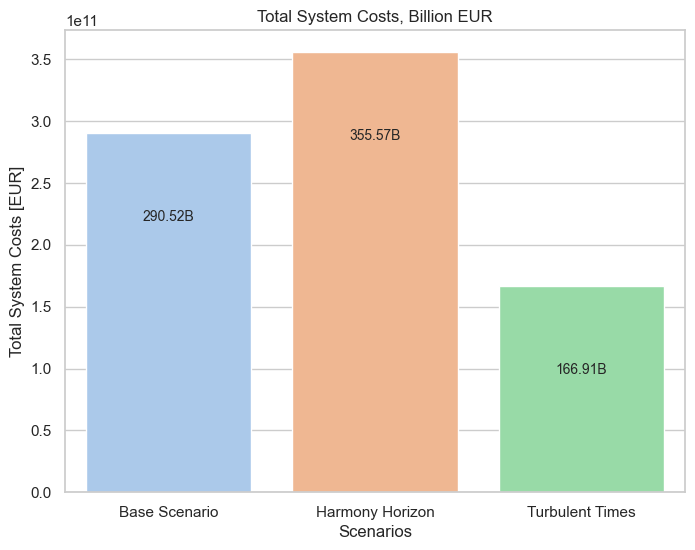

In [52]:
scenarios = ['Base Scenario', 'Harmony Horizon', 'Turbulent Times']

# Set the Seaborn style and palette
sns.set(style="whitegrid")
palette = sns.color_palette('pastel')

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=scenarios, y=tot_sys_costs, palette=palette)

# Displaying the cost/value on each bar
for index, value in enumerate(tot_sys_costs):
    plt.text(index, value - 0.2 * max(tot_sys_costs), f'{value/1e9:.2f}B', ha='center', fontsize=10)

plt.xlabel("Scenarios")
plt.ylabel("Total System Costs [EUR]")
plt.title("Total System Costs, Billion EUR")
plt.show()



### Sensitivity Analysis
- Checking how sensitive the total costs is to changes in the following parameters:

1. Renewable Percentage Target
    - From 10% to 100% renewable-based system
    
2. Capacity Factor for Gas
    - From 0.1 to 1.0, reflecting change in import possibilities
    

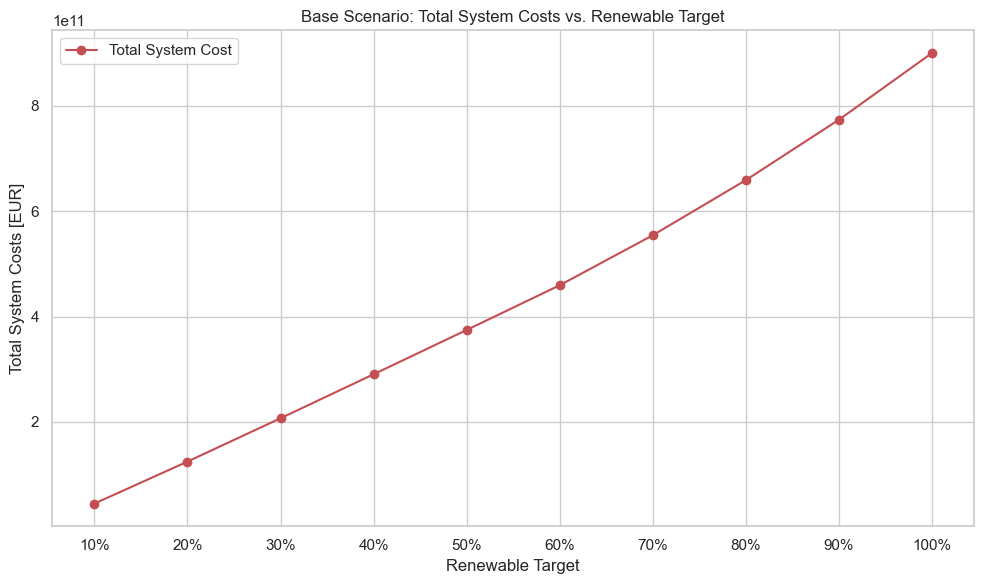

In [86]:
'''1. Changing Renewable Percentage Target from 0.1 to 1.0'''

VariousTargets = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
BaseCosts_VariousRenTargets = [
    45112108674.589333,
    124844010309.426682,
    207035336311.220215,
    290515088851.865234,
    374500254209.394409,
    459351641283.788208,
    554218593545.000244,
    658786166266.835815,
    773402096764.400879,
    899897567946.725342
]

# Set Seaborn dark palette
sns.set_palette("dark")

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(VariousTargets, BaseCosts_VariousRenTargets, marker='o', linestyle='-', color='r', label='Total System Cost')
plt.xlabel('Renewable Target')
plt.ylabel('Total System Costs [EUR]')
plt.title('Base Scenario: Total System Costs vs. Renewable Target')
plt.legend()
plt.grid(True)
plt.xticks(VariousTargets, [f'{int(target * 100)}%' for target in VariousTargets])  # Set x-ticks to percentages
plt.tight_layout()

# Show plot
plt.show()



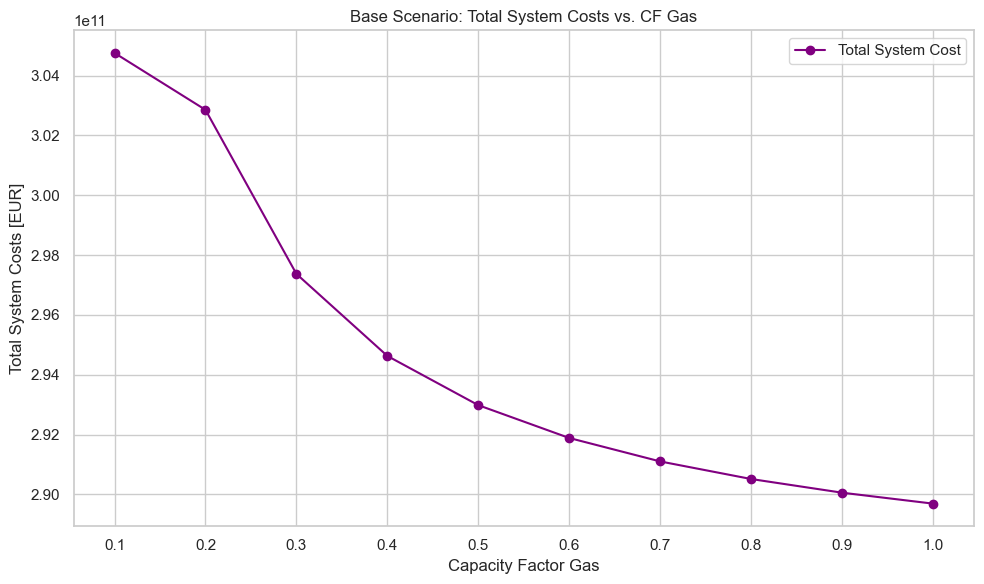

In [91]:
'''2. Changing Capacity Factor Gas from 0.1 to 1.0'''

VariousTargets = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
BaseCosts_VariousCFs = [
    304755823797.891968,
    302854953256.865173,
    297370569076.865234,
    294628376986.865173,
    292983061732.865173,
    291886184896.865173,
    291102701442.579468,
    290515088851.865234,
    290058056836.865173,
    289692431224.865234
]

# Set Seaborn dark palette
sns.set_palette("dark")

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(VariousTargets, BaseCosts_VariousCFs, marker='o', linestyle='-', color='purple', label='Total System Cost')
plt.xlabel('Capacity Factor Gas')
plt.ylabel('Total System Costs [EUR]')
plt.title('Base Scenario: Total System Costs vs. CF Gas')
plt.legend()
plt.grid(True)
plt.xticks(VariousTargets)
plt.tight_layout()

# Show plot
plt.show()

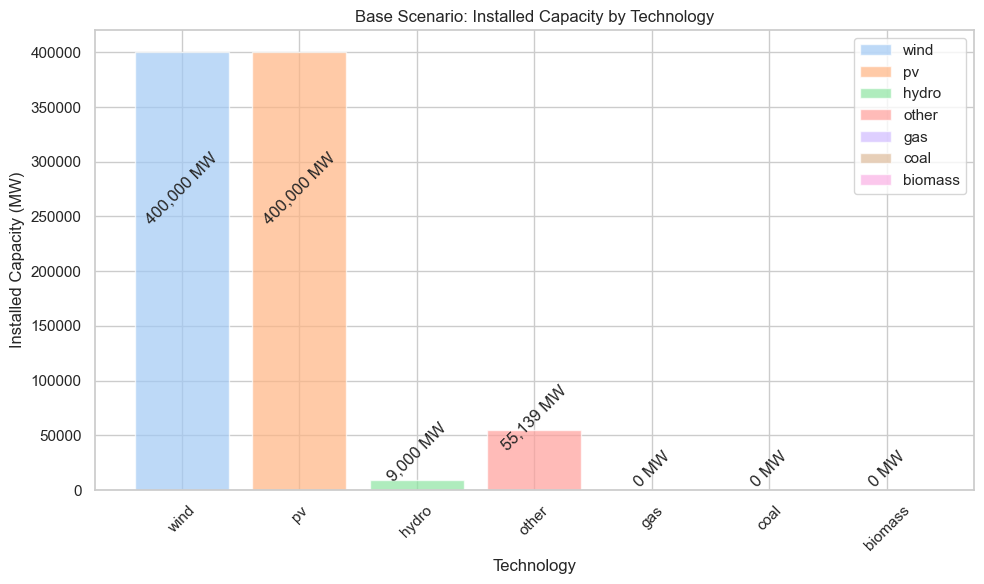

In [79]:
'''Plotting system configurations for different renewable targets'''

'''Installed Capacity for the three scenarios'''
import matplotlib.pyplot as plt

# Get the technologies and their capacities for the Base Scenario
technology_columns = BaseInstalled_df['technology'].tolist()
capacity_columns = BaseInstalled_df['level'].tolist()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot installed capacities for each technology in the Base Scenario
for i, tech in enumerate(technology_columns):
    value = capacity_columns[i]
    plt.bar(tech, value, label=tech, alpha=0.7)
    plt.text(tech, value * 0.6, f'{value:,.0f} MW', ha='center', va='bottom', rotation=45)

plt.xlabel('Technology')
plt.ylabel('Installed Capacity (MW)')
plt.title('Base Scenario: Installed Capacity by Technology')
plt.xticks(rotation=45, ha='center')
plt.legend()
plt.tight_layout()

plt.show()

